In [1]:
image_path1 = '/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 (16).tiff'
image_path2 = '/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 (17).tiff'

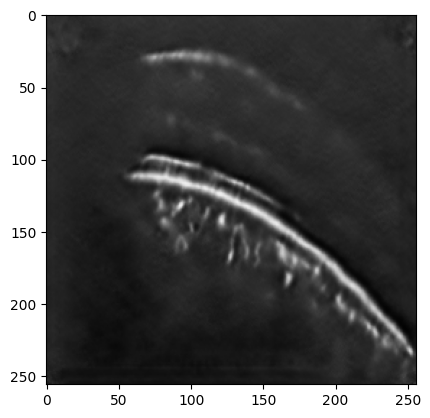

In [2]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
  
# Reading image from folder where it is stored 
img1 = cv2.imread(image_path1) 
img2 = cv2.imread(image_path2) 

# Plotting of image1 and image2 
#plt.subplot(121),
plt.imshow(img1) 
#plt.subplot(122), plt.imshow(img2) 
  
plt.show() 

In [3]:
img = Image.open(image_path1).resize((256, 256))
img_data = np.array(img)
print(img_data)
def display_image_from_array(image_array):
    plt.imshow(image_array)
    plt.axis('off')  # Hide axes
    plt.show()

# Display the image
display_image_from_array(img_data)

NameError: name 'Image' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
# Load the VGG16 model with pretrained ImageNet weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Define a new model that outputs the features from the last convolutional layer
feature_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer('block5_pool').output)


In [ ]:
vgg_model.summary()

In [ ]:
from PIL import Image
import numpy as np

def display_image_from_array(image_array):
    img = Image.fromarray((image_array * 255).astype(np.uint8))
    img.show()

In [ ]:
def extract_features(img_data):
    if img_data.ndim == 2:  # If the image is grayscale, convert it to RGB
        img_data = np.stack((img_data,)*3, axis=-1)
    #display_image_from_array(img_data)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = feature_extractor.predict(img_data)
    return features.flatten()

# Function to compute cosine similarity
def compute_cosine_similarity(features1, features2):
    return cosine_similarity([features1], [features2])[0][0]


In [ ]:
img_path2 = '/kaggle/input/check12/RawDataQA1 (1).tiff'         
img2 = Image.open(img_path2).resize((256, 256))
img_data2 = np.array(img2) 

img2 = Image.fromarray(img_data2)

# Define the coordinates of the region of interest (ROI) to zoom in
# Format: (left, upper, right, lower)
roi = (50, 50, 200, 200)  # Example coordinates, adjust as needed

# Crop the region of interest from the original image
cropped_img = img2.crop(roi)

# Resize the cropped image to a larger size
zoomed_in_img = cropped_img.resize((256, 256))  # Adjust the size as needed

# Convert the zoomed-in image to a numpy array
zoomed_in_img_array = np.array(zoomed_in_img)

# Display the original image and the zoomed-in version
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_data2, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Zoomed-in Image')
plt.imshow(zoomed_in_img_array, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def right_shift_image(img_data, shift_amount):
    if shift_amount >= img_data.shape[1]:
        raise ValueError("Shift amount exceeds image width")
    # Perform the right shift using NumPy slicing
    shifted_img = np.roll(img_data, shift_amount, axis=1)
    return shifted_img

# Load the image and convert it to a NumPy array
img_path2 = '/kaggle/input/check12/RawDataQA1 (1).tiff'
img2 = Image.open(img_path2).resize((256, 256))
img_data = np.array(img2)

# Define the amount of right shift (in pixels)
shift_amount = 10  # Example shift amount, adjust as needed

# Shift the image to the right
right_shifted_img_data = right_shift_image(img_data, shift_amount)

# Display the right-shifted image
plt.imshow(right_shifted_img_data, cmap='gray')
plt.title('Right-Shifted Image')
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

def rotate_image(img_data, angle):
    """
    Rotate an image represented as a NumPy array by a given angle.
    
    Parameters:
        img_data (numpy.ndarray): NumPy array representing the image.
        angle (float): Angle of rotation in degrees.
    
    Returns:
        numpy.ndarray: NumPy array representing the rotated image.
    """
    # Rotate the image using scipy.ndimage.rotate
    rotated_img = rotate(img_data, angle, reshape=False, mode='nearest')
    
    return rotated_img

# Load the image and convert it to a NumPy array
img_path2 = '/kaggle/input/check12/RawDataQA1 (1).tiff'
img2 = Image.open(img_path2).resize((256, 256))
img_data = np.array(img2)

# Define the rotation angle (in degrees)
angle = 30  # Example rotation angle, adjust as needed

# Rotate the image
rotated_img_data = rotate_image(img_data, angle)

# Display the rotated image
plt.imshow(rotated_img_data, cmap='gray')
plt.title(f'Rotated Image by {angle} degrees')
plt.axis('off')
plt.show()


In [ ]:

#NOTE->zoomed in images
# img2 = Image.fromarray(img_data1)
# roi = (50, 50, 200, 200)  # Example coordinates, adjust as needed
# cropped_img = img2.crop(roi)# Crop the region of interest from the original image
# zoomed_in_img = cropped_img.resize((256, 256))  # Adjust the size as needed
# zoomed_in_img_array = np.array(zoomed_in_img)

#NOTE->shifted by 50 pixels
# shifted_img = np.roll(img_data1, 5 , axis=1)

# rotated_img = rotate(img_data1, 10, reshape=False, mode='nearest')


In [ ]:
img_path1 = '/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 (20).tiff'
img_path2 = '/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 (19).tiff'
img1 = Image.open(img_path1).resize((256, 256))
img_data1 = np.array(img1)
img2 = Image.open(img_path2).resize((256, 256))
img_data2 = np.array(img2)

features_image1 = extract_features(img_data1)
features_image2 = extract_features(img_data2)
similarity_score = compute_cosine_similarity(features_image1, features_image2)
print(f"Cosine Similarity: {similarity_score}")


In [ ]:
for i in range(11, 23):
    img_path1 = f'/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 ({i}).tiff'
    img_path2 = f'/kaggle/input/denoised-images-v6/0/RawDataQA (4)/RawDataQA4 ({i+1}).tiff'
    print(i)
    print(i+1)
    img1 = Image.open(img_path1).resize((256, 256))
    img_data1 = np.array(img1)
    img2 = Image.open(img_path2).resize((256, 256))
    img_data2 = np.array(img2)
    features_image1 = extract_features(img_data1)
    features_image2 = extract_features(img_data2)
    similarity_score = compute_cosine_similarity(features_image1, features_image2)
    print(f"Cosine Similarity: {similarity_score}")